In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# For displaying graphs

%matplotlib inline

In [3]:
#Importing DF

path = r'C:\Users\William Inglish\Project 6 Liquor Sales'

df_sales = pd.read_csv(os.path.join(path,'02 Data', 'Prepared', 'Sales_Wrangled.csv'), index_col = 0)

In [4]:
df_sales.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county_name,...,item_number,item_description,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


In [5]:
df_sales.shape

(2805307, 24)

In [6]:
def remove_column_outliers(df, column):
    
    # IQR
    # Calculate the upper and lower limits
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
 
    # Printing bounds
    print('Lower bound is: ', lower)
    print('Upper bound is: ', upper)
    
    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(df[column]>=upper)[0]
    lower_array = np.where(df[column]<=lower)[0]
 
    # Removing the outliers
    df.drop(index=upper_array, inplace=True)
    df.drop(index=lower_array, inplace=True)
    df.reset_index(drop=True, inplace=True)

In [7]:
remove_column_outliers(df_sales, 'bottles_sold')

Lower bound is:  -10.5
Upper bound is:  25.5


In [8]:
df_sales.shape

(2651460, 24)

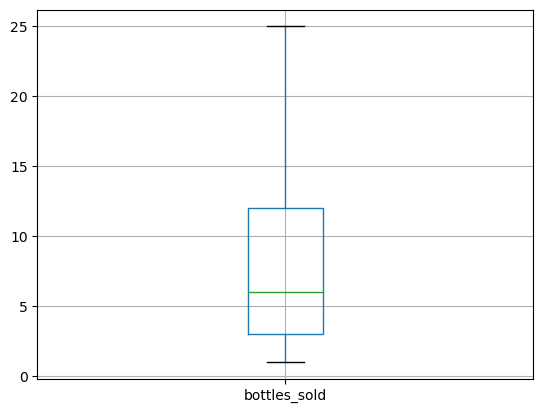

In [9]:
boxplot2 = df_sales.boxplot(column=['bottles_sold'])

In [10]:
remove_column_outliers(df_sales, 'sale_dollars')

Lower bound is:  -134.07500000000002
Upper bound is:  328.125


In [11]:
df_sales.shape

(2547648, 24)

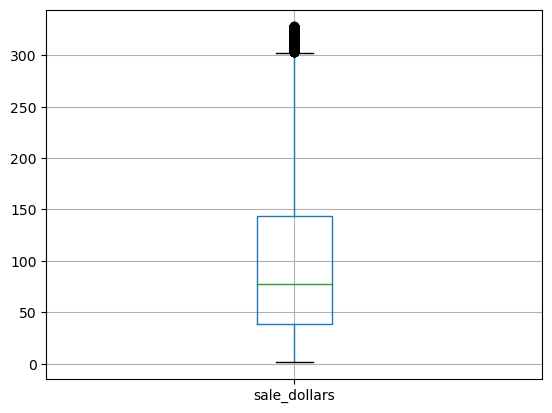

In [12]:
boxplot2 = df_sales.boxplot(column=['sale_dollars'])

In [13]:
remove_column_outliers(df_sales, 'volume_sold_liters')

Lower bound is:  -9.75
Upper bound is:  20.25


In [14]:
df_sales.shape

(2478605, 24)

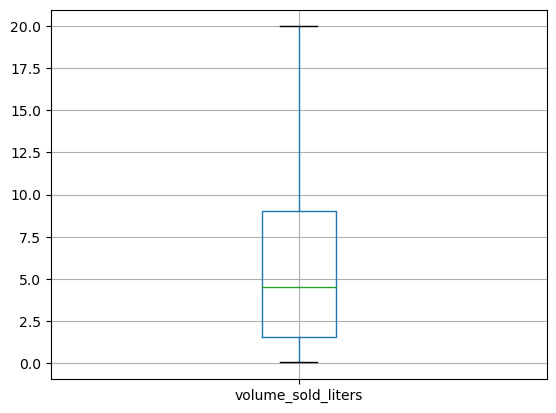

In [15]:
boxplot2 = df_sales.boxplot(column=['volume_sold_liters'])

In [16]:
remove_column_outliers(df_sales, 'volume_sold_gallons')

Lower bound is:  -2.5799999999999996
Upper bound is:  5.34


In [17]:
df_sales.shape

(2478605, 24)

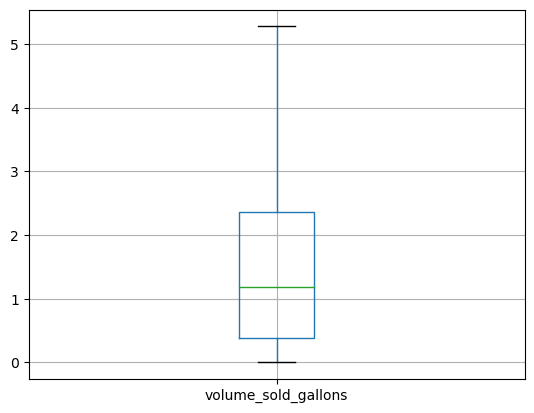

In [18]:
boxplot2 = df_sales.boxplot(column=['volume_sold_gallons'])

In [19]:
remove_column_outliers(df_sales, 'package_size')

Lower bound is:  -3.0
Upper bound is:  21.0


In [20]:
df_sales.shape

(2209363, 24)

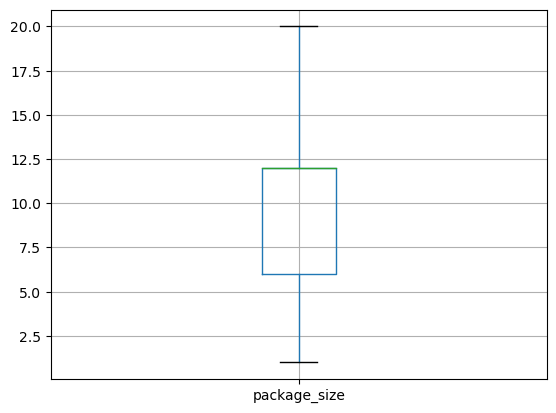

In [21]:
boxplot2 = df_sales.boxplot(column=['package_size'])

In [22]:
remove_column_outliers(df_sales, 'state_bottle_cost')

Lower bound is:  -4.265000000000001
Upper bound is:  25.775


In [23]:
df_sales.shape

(2063417, 24)

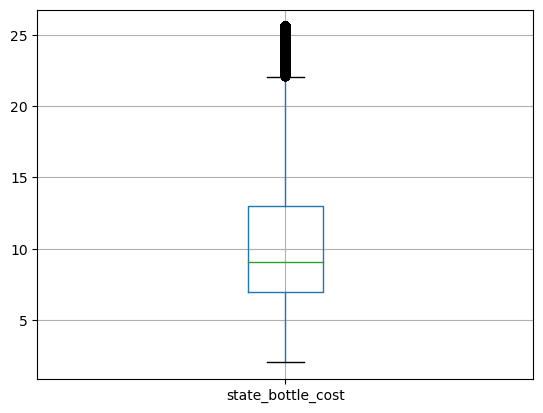

In [24]:
boxplot2 = df_sales.boxplot(column=['state_bottle_cost'])